In [ ]:
"Predicting Natural Gas Prices Using Machine Learning:"

In [ ]:
"Alyssa Robinson - ITCS-5156-051"

In [12]:
# Install and Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# This dataset is from DataHub and can be downloaded at: "ttps://datahub.io/core/natural-gas "

In [13]:
import datapackage
import pandas as pd

data_url = 'https://datahub.io/core/natural-gas/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

            Date  Price
0     1997-01-07   3.82
1     1997-01-08   3.80
2     1997-01-09   3.61
3     1997-01-10   3.92
4     1997-01-13   4.00
...          ...    ...
5948  2020-08-26   2.52
5949  2020-08-27   2.52
5950  2020-08-28   2.46
5951  2020-08-31   2.30
5952  2020-09-01   2.22

[5953 rows x 2 columns]
       Month  Price
0    1997-01   3.45
1    1997-02   2.15
2    1997-03   1.89
3    1997-04   2.03
4    1997-05   2.25
..       ...    ...
279  2020-04   1.74
280  2020-05   1.75
281  2020-06   1.63
282  2020-07   1.77
283  2020-08   2.30

[284 rows x 2 columns]
Empty DataFrame
Columns: [[{"Date": "1997-01-07",  "Price": 3.82}, {"Date": "1997-01-08",  "Price": 3.8}, {"Date": "1997-01-09",  "Price": 3.61}, {"Date": "1997-01-10",  "Price": 3.92}, {"Date": "1997-01-13",  "Price": 4.0}, {"Date": "1997-01-14",  "Price": 4.01}, {"Date": "1997-01-15",  "Price": 4.34}, {"Date": "1997-01-16",  "Price": 4.71}, {"Date": "1997-01-17",  "Price": 3.91}, {"Date": "1997-01-20",  "Price": 3.26}

In [15]:
# Load the daily gas price dataset 
df_daily = pd.read_csv('/Users/arobi/Documents/MLProject/daily_csv.csv')
display(df_daily)

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


In [16]:
# Get a summary of the data
df_daily_describe = df_daily.describe()
df_daily_describe

,Price
count,5952.000000
mean,4.184644
std,2.190361
min,1.050000
25%,2.650000
50%,3.530000
75%,5.240000
max,18.480000


In [17]:

# Check for null values
df_daily.isnull().any()

df_daily['Price'].fillna(df_daily['Price'], inplace=True)

In [18]:
from sklearn.impute import SimpleImputer
# Data Cleaning
df_daily_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_daily_freq.fit(df_daily)
df_daily_freq.transform(df_daily)

display(df_daily_freq)

SimpleImputer(strategy='most_frequent')

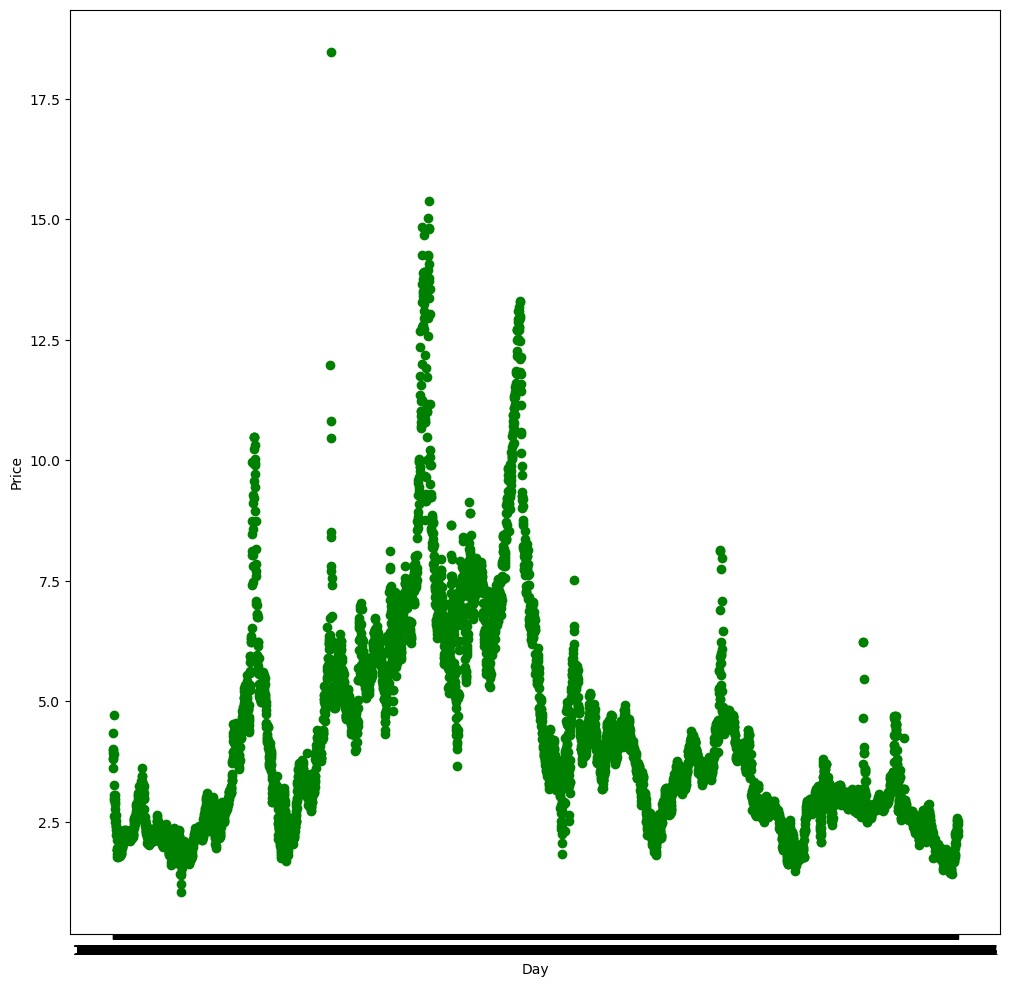

In [19]:
# Visualize the Dataset:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.scatter(df_daily['Date'], df_daily['Price'], color='green')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()


In [20]:
df_daily.shape

(5953, 2)

In [21]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'], format = "%Y-%m-%d")

In [22]:
data = df_daily.set_index('Date').sort_index()

In [23]:
df_daily.iloc[2976] # row that marks about 80% of data

Date     2008-12-08 00:00:00
Price                   5.73
Name: 2976, dtype: object

In [24]:
data = data.sort_values(by = 'Date')
X = data['1997-01-07 00:00:00': '2008-12-07 00:00:00'] 
y = data['2008-12-09 00:00:00': '2020-09-01 00:00:00'] 

In [25]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
y = lb.fit_transform(y)

C:\Users\arobi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



# Train_test_split is used to split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=0)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.8114478114478114, Test Accuracy: 0.013437849944008958


In [27]:
daily_predict = model.predict(X_test)
daily_predict

array([ 80, 162, 192, ..., 136, 115, 131], dtype=int64)

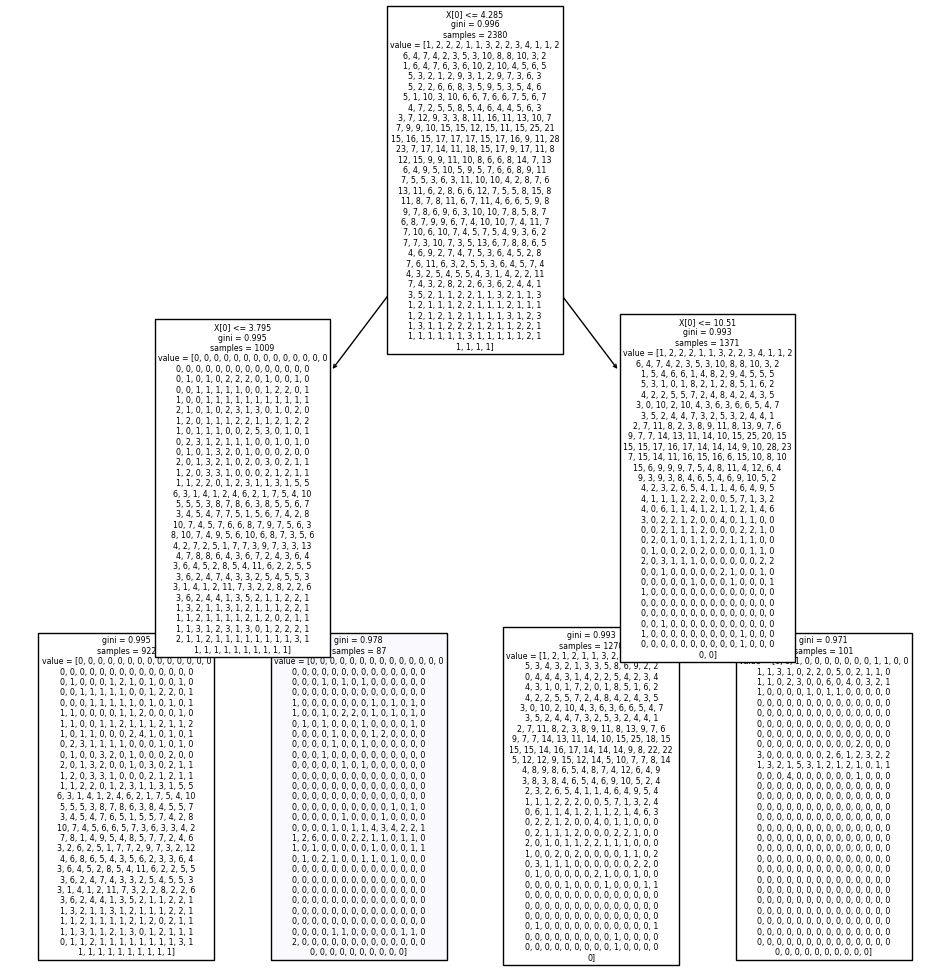

In [126]:
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(random_state=0, max_depth=2)
model.fit(X_train, y_train)

plt.figure(figsize=(12,12))
tree = plot_tree(model, filled=True)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=0)

# Range of `n_estimators` values to explore.
min_estimators = 7
max_estimators = 100
rng = range(min_estimators, max_estimators, 7)

accuracies = {'train': [], 'test': [], 'oob': []}

for n_est in rng:
    rf.set_params(n_estimators=n_est)  # set the number of trees
    rf.fit(X_train, y_train)

    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    
    # Track errors for different number of estimators
    accuracies['train'].append(train_score)
    accuracies['test'].append(test_score)
    accuracies['oob'].append(rf.oob_score_)
    
    print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))


C:\Users\arobi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Train Accuracy: 0.7407407407407407, Test Accuracy: 0.012318029115341545
Train Accuracy: 0.7710437710437711, Test Accuracy: 0.011944755505785741
Train Accuracy: 0.7912457912457912, Test Accuracy: 0.01269130272489735
Train Accuracy: 0.8047138047138047, Test Accuracy: 0.013064576334453154
Train Accuracy: 0.8047138047138047, Test Accuracy: 0.01269130272489735
Train Accuracy: 0.8047138047138047, Test Accuracy: 0.011944755505785741
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.012318029115341545
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.012318029115341545
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.011944755505785741
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.01269130272489735
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.013064576334453154
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.013064576334453154
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.013064576334453154
Train Accuracy: 0.8114478114478114, Test Accuracy: 0.01231802911534

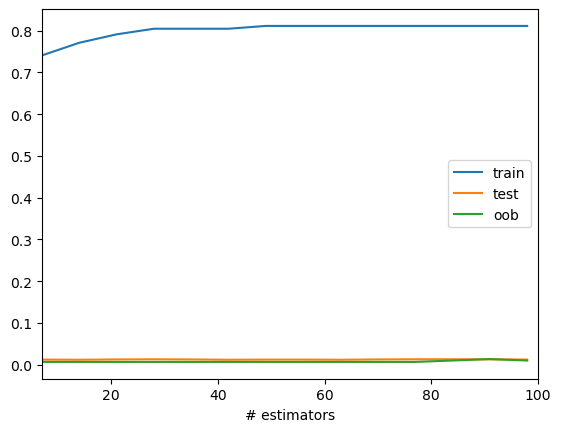

In [29]:
plt.plot(rng, accuracies['train'], label="train")
plt.plot(rng, accuracies['test'], label="test")
plt.plot(rng, accuracies['oob'], label="oob")
plt.xlim(min_estimators, max_estimators)
plt.xlabel("# estimators")
plt.legend()